[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_03/blob/master/Th03_CC_DJ_Principal_Components_Inverse_Coding_Challenge_Master.ipynb)

# PCA matrix inverse

Review [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

In this coding challenge, you will extract the components of PCA and apply them manually. Doing so will enable you to leverage the PCA libraries more effectively, without needing to learn the most core mathematics ([eigendecomposition](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix)).

During review of this coding challenge I'll talk about each argument of the scikit-learn `PCA` library. Take notes. :)jj

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  


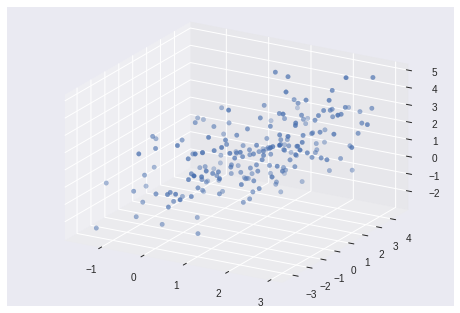

In [11]:
# LAMBDA SCHOOL
#
# MACHINE LEARNING
#
# MIT LICENSE

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

points1 = np.random.multivariate_normal([1,1,1],[[1,2,2],[0.1,1,1.5],[1,2,1]],200)

x, y, z = points1.T

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure();
ax = fig.add_subplot(111, projection='3d', proj_type='ortho');
# *points.T makes it so you don't have to decompose the matrix in order to plot it
ax.scatter(*points1.T);

(3, 200)


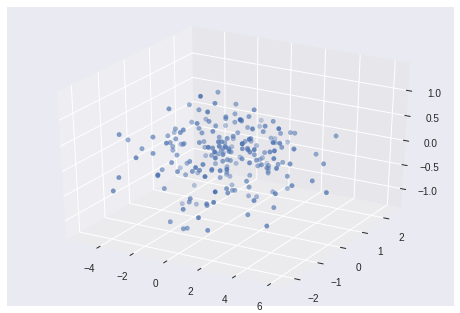

In [39]:
# Use PCA
from sklearn.decomposition import PCA

model = PCA()
model.fit(points1)
points2 = model.transform(points1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*points2.T)
print(points2.T.shape)

# The points are now better distributed, maximizing their variance or spread.

## Back to the original

The `points1` object has been transformed by the PCA model into a new set of points.

The `model` object contains attributes that represent that transformation:

* `components_`: The new basis vectors (eigenvectors) that maximize the variance of the original data
* `explained_variance_`: The amount of variance per eigenvector (called eigenvalues).

Remember that the inverse of a matrix $M^{-1}$ is the matrix that reverses the transformation created by $M$: $MM^{-1} = I$. `components_` is the exact $M$ which the PCA library used to transform your data. Compute its inverse, then project `points1` back into the original space.

In [41]:
# print(points1,points2)
#print('model.components_','\n',model.components_)
#print(np.linalg.inv(model.components_))


# eigen 
oc = model.components_ # eigen vectors
rc = np.linalg.inv(model.components_)

print('eigenvectors', oc)
print('\n')
print(rc)

print(np.dot(oc, rc))


print('\n',model.explained_variance_) # eigen values

# Invert the components of the PCA and re-apply

old_points = points2.T * rc



# Plot again. This should perfectly match the original 3d plot.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*old_points)

eigenvectors [[-0.33946326 -0.73603131 -0.58568132]
 [ 0.51061116  0.37873041 -0.77190642]
 [ 0.78996262 -0.56108928  0.24726075]]


[[-0.33946326  0.51061116  0.78996262]
 [-0.73603131  0.37873041 -0.56108928]
 [-0.58568132 -0.77190642  0.24726075]]
[[ 1.00000000e+00 -7.38871277e-17  8.04322566e-17]
 [ 9.89447266e-17  1.00000000e+00 -2.24058714e-17]
 [ 2.46169873e-17 -4.95532109e-17  1.00000000e+00]]

 [4.26657232 0.81542535 0.22293129]


ValueError: ignored

## Consider `n_components`

If you built your PCA using the `n_components=n` argument, and `n` is less than the dimensionality of your original data, how does this affect the above assignment?